<a href="https://colab.research.google.com/github/sharwari448/Hello-World/blob/master/Super_Market_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Data


The dataset contains supermarket sales data, including customer details, order information, shipping details, product categories, and sales amounts.   
 It consists of multiple categorical columns like Segment, Ship Mode, Category, Region, State, and City, along with numerical columns such as Sales and Shipping Delay (Days).      
 The dataset helps analyze sales trends, regional performance, and the impact of shipping delays. This analysis provides insights to improve sales strategies, inventory management, and customer satisfaction.

Questions for Analysis
1. Sales Analysis  
a1. Which segment has the highest and the lowest sales ?  
b1. Which Categories and Sub-categories has the highest sales ?   
c1. Sales at this point from start ?

2. Location wise sales Analysis  
a1. Sales per city and state ?    
a2. Sales per region ?

3. Product wise sales Analysis    
a1. Which product has the highest and lowest sales ?

4. Does Time delay affect sales   
a1. Difference between order_date and shpping_date does affect sales ?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Analysis Process (DAP)

## Data Accessing through ".csv" file

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Supermarket/Copy of Copy of supermarket.csv")

### Data Quality Dimensions

1. Completeness -> Pincode column data is missing.
2. Validity -> Some values in pincode are 4 digit values which are suppose to be 5 digits
3. Accuracy -> Data type of Postal code is given as float it should be string
4. Consistency -> Data is Consistent

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
# Step 1: Convert to string (ensure it’s not float)
df["Postal Code"] = df["Postal Code"].astype(str)

In [8]:
# Step 2: Remove any decimal points (if present due to float conversion)
df["Postal Code"] = df["Postal Code"].str.split('.').str[0]

In [9]:
# Step 3: Ensure all ZIP codes are exactly 5 digits (adding leading zeros if needed)
df["Postal Code"] = df["Postal Code"].str.zfill(5)

In [10]:
df['Postal Code'].sample(10)

,Postal Code
4115,98105
2011,77041
8966,19120
7898,38109
4560,90049
4761,43229
9492,73120
213,44256
8492,79424
5464,85254


In [11]:
# Fill blank (empty) Postal Code values with '05401' for Burlington
df["Postal Code"] = df["Postal Code"].fillna("05401")


In [12]:
df['Postal Code'].isnull().sum()

0

In [13]:
# Convert Order Date and Ship Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%Y-%m-%d", errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%Y-%m-%d", errors="coerce")


In [14]:
duplicates = df.duplicated().sum()
duplicates


0

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#EDA

In [16]:
df.describe()

,Row ID,Order Date,Ship Date,Sales
count,9800.000000,0,0,9800.000000
mean,4900.500000,NaT,NaT,230.769059
min,1.000000,NaT,NaT,0.444000
25%,2450.750000,NaT,NaT,17.248000
50%,4900.500000,NaT,NaT,54.490000
75%,7350.250000,NaT,NaT,210.605000
max,9800.000000,NaT,NaT,22638.480000
std,2829.160653,NaN,NaN,626.651875


In [17]:
# Which Segment has the highest and the lowest sales
highest_segment = df['Segment'].max()
lowest_segment = df['Segment'].min()
print(highest_segment)
print(lowest_segment)

Home Office
Consumer


In [18]:
# Which Categories and Sub-categories has the highest sales
highest_category = df['Category'].max()
lowest_category = df['Category'].min()
print(highest_category)
print(lowest_category)

Technology
Furniture


In [19]:
# Sales at current time from starting
sales_at_start = df['Sales'].sum()
print(sales_at_start)

2261536.7827000003


In [20]:
# Location wise sales Analysis Sales per city and state
city_sales = df.groupby('City')['Sales'].sum().sort_values()
print(city_sales)

City
Abilene               1.392
Elyria                1.824
Jupiter               2.064
Pensacola             2.214
Ormond Beach          2.808
                    ...    
Philadelphia     108841.749
San Francisco    109041.120
Seattle          116106.322
Los Angeles      173420.181
New York City    252462.547
Name: Sales, Length: 529, dtype: float64


In [21]:
# Location wise sales Analysis Sales per state
state_sales = df.groupby('State')['Sales'].sum().sort_values()
print(state_sales)

State
North Dakota               919.9100
West Virginia             1209.8240
Maine                     1270.5300
South Dakota              1315.5600
Wyoming                   1603.1360
District of Columbia      2865.0200
Kansas                    2914.3100
Idaho                     4382.4860
Iowa                      4443.5600
New Mexico                4783.5220
Montana                   5589.3520
New Hampshire             7292.5240
Nebraska                  7464.9300
South Carolina            8481.7100
Vermont                   8929.3700
Louisiana                 9131.0500
Mississippi              10771.3400
Utah                     11220.0560
Arkansas                 11678.1300
Connecticut              13384.3570
Nevada                   16729.1020
Oregon                   17284.4620
Alabama                  19510.6400
Oklahoma                 19683.3900
Missouri                 22205.1500
Rhode Island             22525.0260
Maryland                 23705.5230
Delaware              

In [22]:
# Location wise sales analysis Sales per region
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
print(region_sales)


Region
South      389151.4590
Central    492646.9132
East       669518.7260
West       710219.6845
Name: Sales, dtype: float64


In [23]:
# Product wise sales Analysis Which product has the highest and lowest sales
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values()
print(product_sales)


Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   1.624
Avery 5                                                                            5.760
Xerox 20                                                                           6.480
Grip Seal Envelopes                                                                7.072
Acme Serrated Blade Letter Opener                                                  7.632
                                                                                 ...    
GBC DocuBind TL300 Electric Binding System                                     19823.479
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Name: Sa

In [24]:
# Does Time delay affect sales Difference between order_date and shpping_date does affect sales
#Calculate the difference in days
df["Shipping Delay (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

#Display summary statistics of shipping delays
print(df["Shipping Delay (Days)"].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Shipping Delay (Days), dtype: float64


In [25]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Shipping Delay (Days)'],
      dtype='object')

##Univariate Analysis

### Categorical Columns - Univariate Analysis

1. Segment → Which segment has the most customers?   
2. Ship Mode → Which shipping mode is used most?  
3.Category → Which product category sells the most?  
4.Sub-Category → Which sub-category is most popular?   
5.Region → Which region has the most orders?   
6.State → Which states contribute the most sales?   
7.City → Top cities for sales

In [26]:
# Segment → Which segment has the most customers
segment_counts = df['Segment'].value_counts()
print(segment_counts)

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


In [27]:
# Ship Mode → Which shipping mode is used most
ship_mode_counts = df['Ship Mode'].value_counts()
print(ship_mode_counts)

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


In [28]:
# Category → Which product category sells the most
category_counts = df['Category'].value_counts()
print(category_counts)

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64


In [29]:
# Sub-Category → Which sub-category is most popular
sub_category_counts = df['Sub-Category'].value_counts()
print(sub_category_counts)

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


In [30]:
# Region → Which region has the most orders
region_counts = df['Region'].value_counts()
print(region_counts)

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64


In [31]:
# State → Which states contribute the most sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(state_sales)

State
California              446306.4635
New York                306361.1470
Texas                   168572.5322
Washington              135206.8500
Pennsylvania            116276.6500
Florida                  88436.5320
Illinois                 79236.5170
Michigan                 76136.0740
Ohio                     75130.3500
Virginia                 70636.7200
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48219.1100
Kentucky                 36458.3900
Arizona                  35272.6570
New Jersey               34610.9720
Colorado                 31841.5980
Wisconsin                31173.4300
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27322.9990
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

In [32]:
# City → Top cities for sales, but too many unique values
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print(city_sales)

City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Sales, Length: 529, dtype: float64


#### Visualization

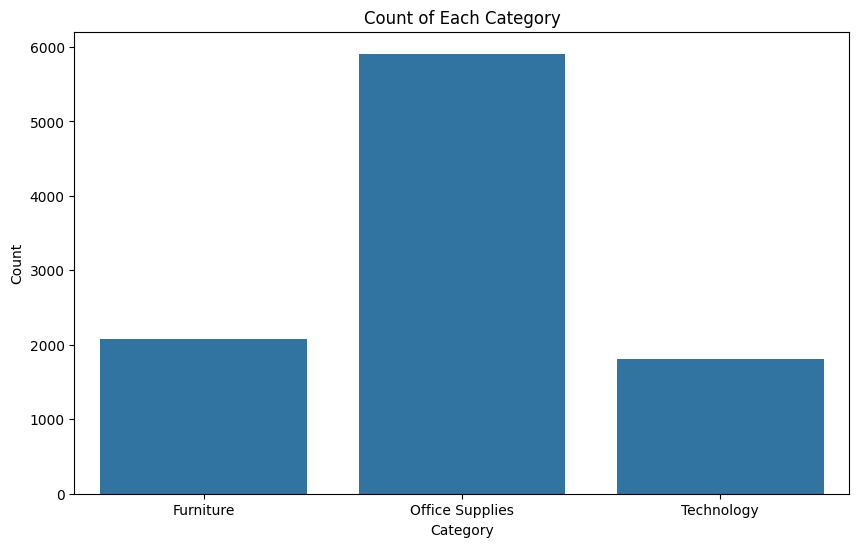

In [33]:
# Bar Chart → Count of each category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

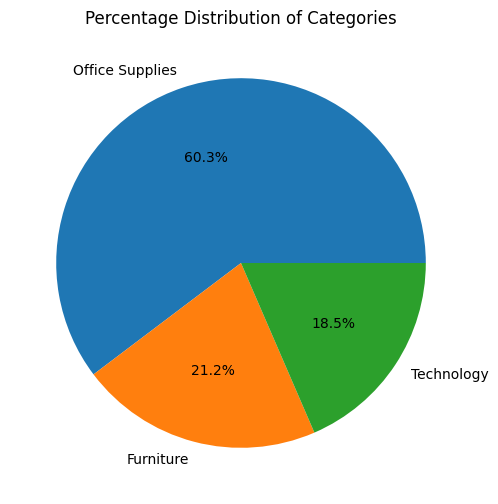

In [34]:
# Pie Chart → Percentage distribution
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Categories')
plt.ylabel('')
plt.show()

### Numerical Columns - Univariate Analysis

1. Sales
2. Shipping Delay (Days)
3. Time Delay
4. Postal Code

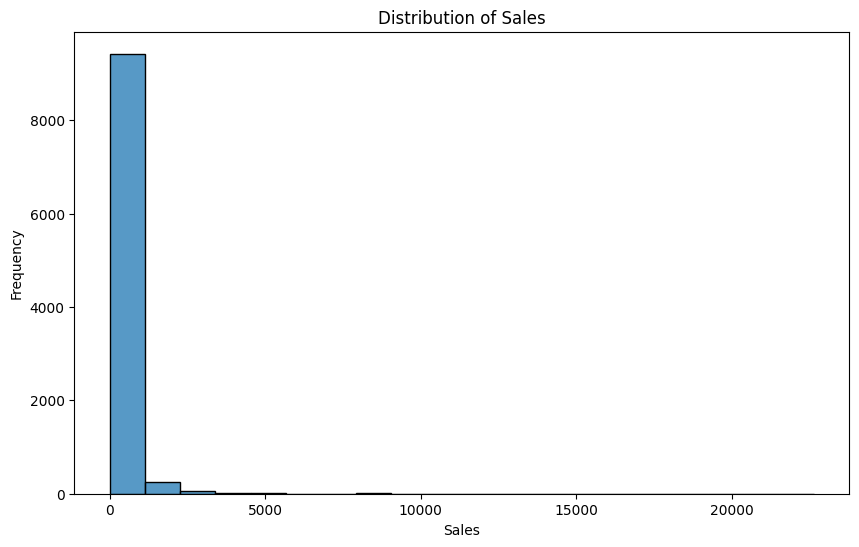

In [35]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

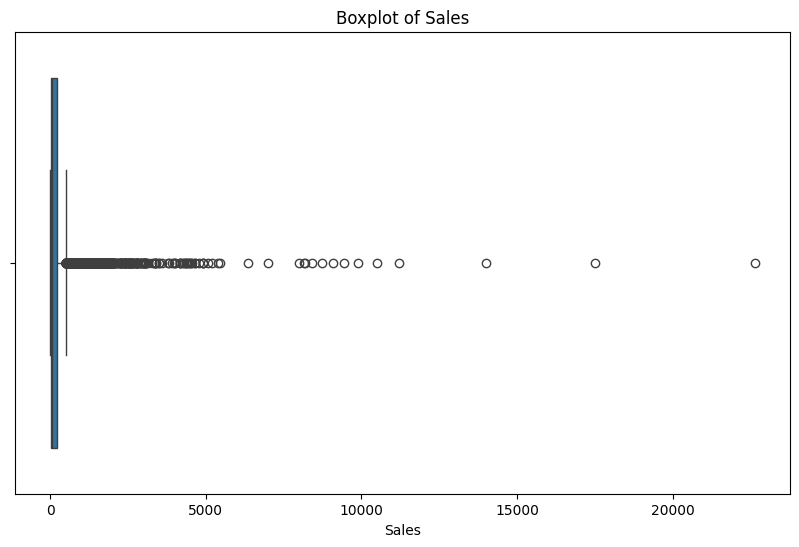

In [36]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

## Bivariate Analysis
1. Segment vs Sales → Which segment generates the most revenue?
2. Ship Mode vs Sales → Which shipping mode contributes most to sales?
3. Category vs Sales → Which category brings the most revenue?
4. Sub-Category vs Sales → Which sub-category is the top seller?
5. Region vs Sales → How does sales vary by region?
6. State vs Sales → Which states contribute the most sales?
7. City vs Sales → Top 10 cities by sales.


In [37]:
# Segment vs Sales
segment_sales = df.groupby('Segment')['Sales'].sum()
print(segment_sales)


Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


In [38]:
#Ship Mode vs Sales
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()
print(ship_mode_sales)

Ship Mode
First Class       3.455723e+05
Same Day          1.252190e+05
Second Class      4.499142e+05
Standard Class    1.340831e+06
Name: Sales, dtype: float64


In [39]:
# Category vs Sales
category_sales = df.groupby('Category')['Sales'].sum()
print(category_sales)

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


In [40]:
# sub-Category vs Sales
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(sub_category_sales)

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64


In [41]:
# Region vs Sales
region_sales = df.groupby('Region')['Sales'].sum()
print(region_sales)

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [42]:
# State vs Sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(state_sales)

State
California              446306.4635
New York                306361.1470
Texas                   168572.5322
Washington              135206.8500
Pennsylvania            116276.6500
Florida                  88436.5320
Illinois                 79236.5170
Michigan                 76136.0740
Ohio                     75130.3500
Virginia                 70636.7200
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48219.1100
Kentucky                 36458.3900
Arizona                  35272.6570
New Jersey               34610.9720
Colorado                 31841.5980
Wisconsin                31173.4300
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27322.9990
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

In [43]:
# City vs Sales
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print(city_sales)

City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64


#Obtained Result on Analysis of the Super Market








#####1. **Segment wise Sales**
1. Consumer: 5,101 -> customers (Consumer has the Highest Sales)
2. Corporate: 3,098 -> customers (Corporate has an Average Sales)
3. Home Office: 1,746 -> customers (Home Office has the lowest Sales)

#####2. **Ship Mode Usage**
1. Standard Class: 6,854 orders (most used)
2. Second Class: 1,909 orders
3. First Class: 1,184 orders
4. Same Day: 498 orders (least used)

#####   3. **Category-wise Sales**
1. Technology: Total Sales = $836,154 (Technology products has the highest sales)            

2. Furniture: $741,999 (Furniture is selled in an average proportion)

3. Office Supplies: $719,046 (Office supply products have the least sales)


#####   4.  **Sub-Category Sales**
**Top-selling sub-categories:**

1. Phones: $330,007 sales (Phones are selled in a high amount)   

2. Chairs: $328,449 sales

3. Storage: $223,843 sales

**Lowest-selling sub-category:**
1. Fasteners: $3,087 sales (lowest)


#####5. **Region-wise Sales Distribution**
1. West: $725,458 (highest sales)

2. East: $678,782 (Intermediate)

3. Central: $502,002 (Intermediate)

4. South: $391,721 (lowest sales)

#####6. **State-wise Sales Contribution**
**Top-selling states(Top 3):**

1. California: $457,688 (highest sales)

2. New York: $310,876

3. Texas: $170,188

**Lowest-selling state:**
1. North Dakota: $919 (lowest sales)

#####7. **City-wise Sales Performance**
1. New York City: $256,368 (highest sales)

2. Los Angeles: $173,822

3. Seattle: $119,089

